### 5-1

In [1]:
# 가설: K-beauty는 성장중?

### 5-2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 폰트 설정
import os
if os.name == 'posix':
    plt.rc('font', family = "AppleGothic")
else:
    plt.rc('font', family = "malgun Gothic")
plt.rc("axes", unicode_minus = False)


In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
df_raw = pd.read_csv(
    "data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221119202700.csv", 
    encoding="cp949")

df_raw[df_raw['국가(대륙)별'] == '미국']


,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


### 5-3

In [6]:
# tidy data / melt

df = df_raw.melt(id_vars = ['국가(대륙)별', '상품군별','판매유형별'], 
                var_name = '기간', value_name = '백만원')
df.shape

(10800, 5)

In [7]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


### 5-4

In [8]:
# 데이터 전처리
# 기간에서 연도 분리 + int화

df['연도'] = df['기간'].map(lambda x:int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [9]:
# 기간에서 분기만 분리 + int화

df['분기'] = df['기간'].map(lambda x: int(x.split('.')[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


In [10]:
# 결측치 변경 (- -> NaN)
# nan -> float임

df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


In [11]:
# 불필요한 column제거 (합계 data제거)

df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [12]:
# 결측치 확인

df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

### 5-5

In [13]:
# 시각화
df_total = df[df['판매유형별'] == '계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


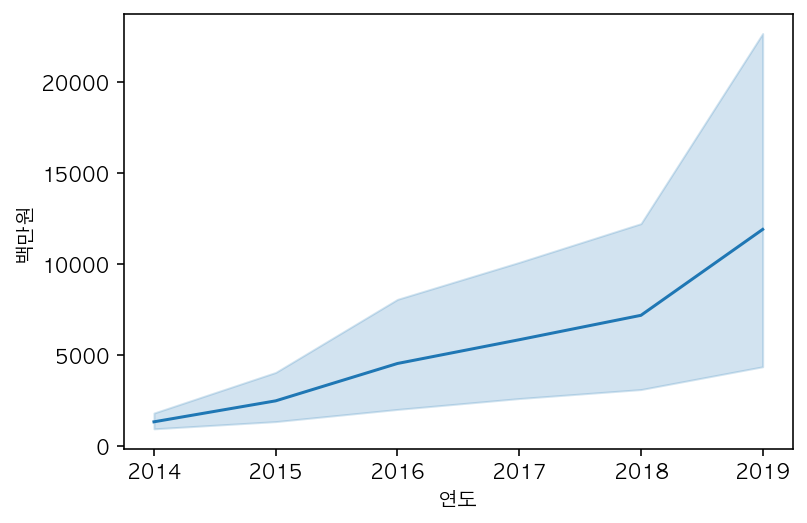

In [14]:
sns.lineplot(data = df_total, x = '연도',  y = '백만원')

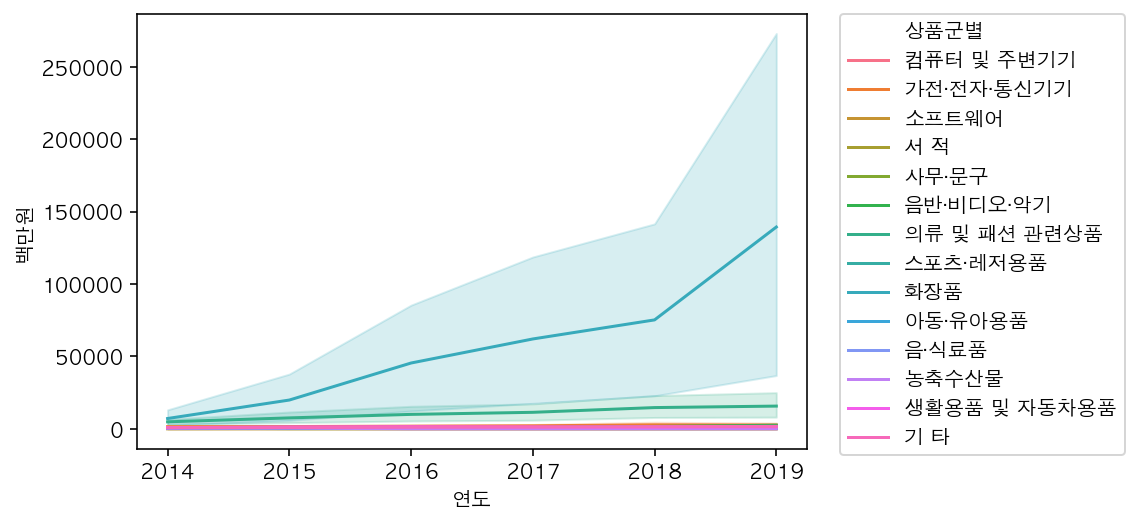

In [15]:
sns.lineplot(data = df_total, x = '연도',  y = '백만원', hue = '상품군별')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
# legend (색상별 품목) 그래프 밖에 표시하는 코드

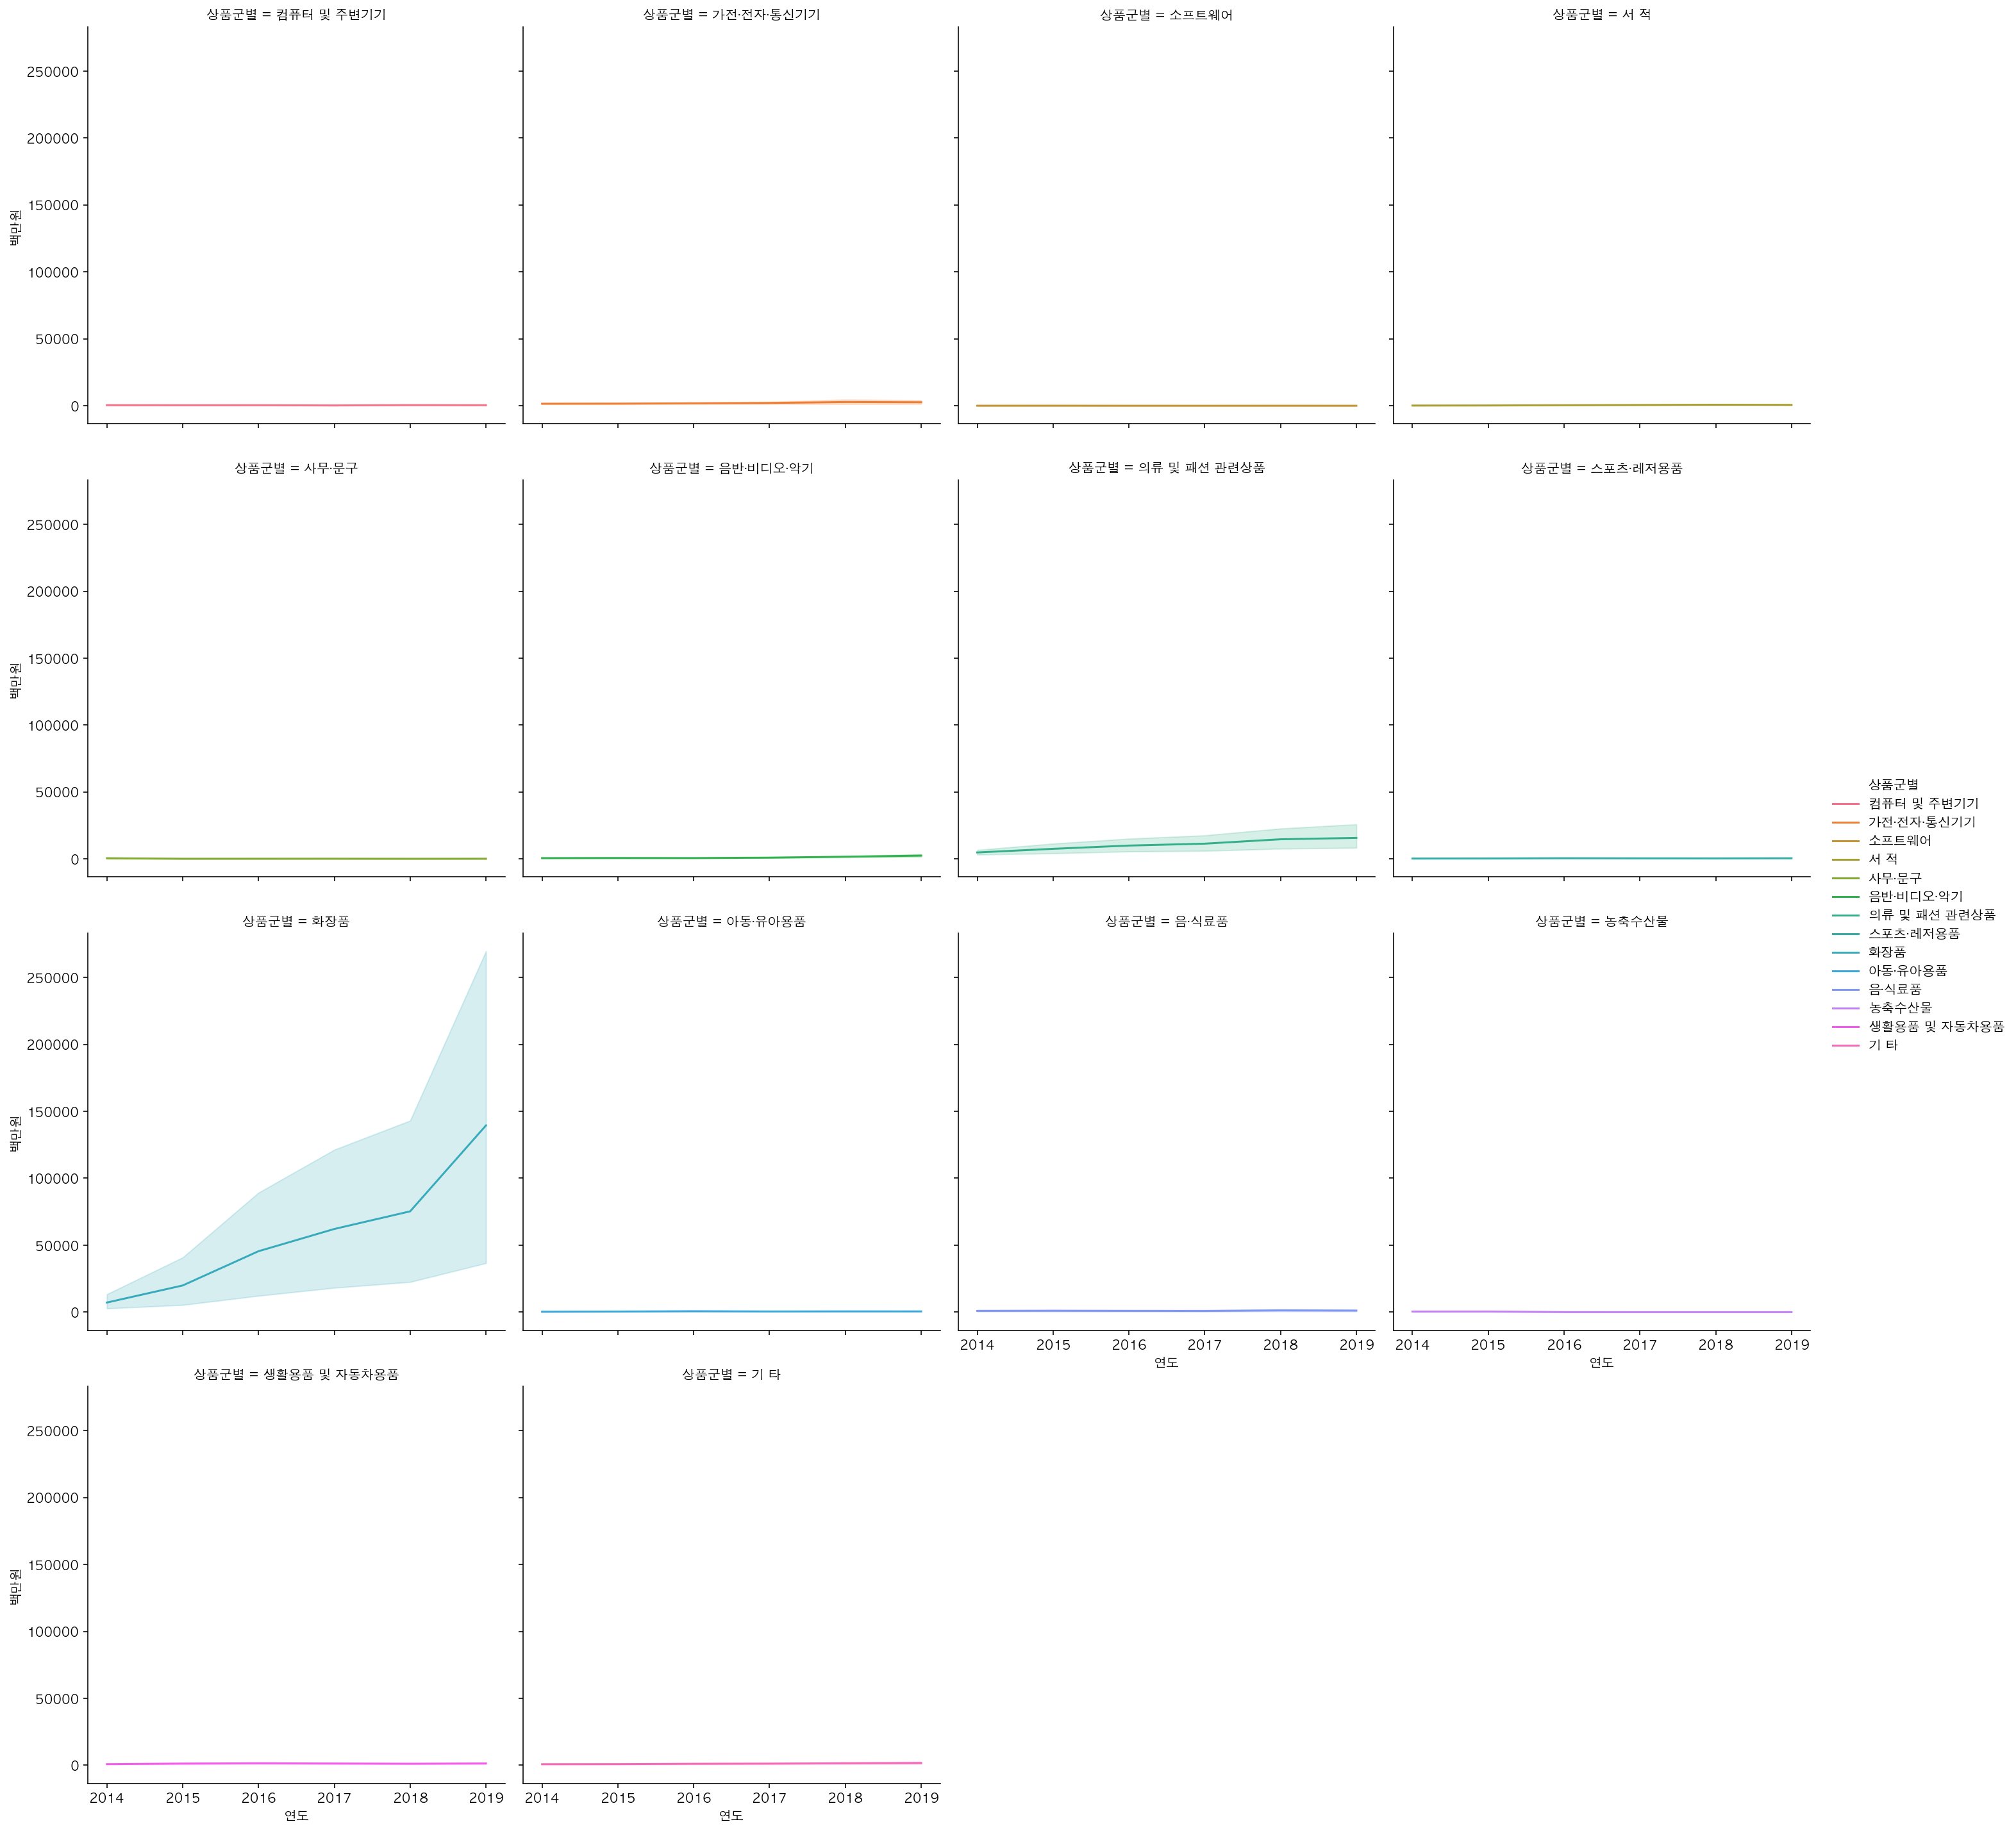

In [16]:
# 그래프 서브플롯으로 자세하게 보기
sns.relplot(data = df_total, x = '연도', y = '백만원', hue = '상품군별', 
            kind = 'line', col = '상품군별', col_wrap = 4)
# col_wrap = 한줄에 몇개씩 출력
# kind = 'line' 없을경우 산점도 그래프를그림

In [17]:
# 증가폭이 큰 '화장품'과 '의류 및 패션 관련상품'을 제외한 data

df_sub = df_total[~df_total['상품군별'].isin(['화장품', '의류 및 패션 관련상품'])].copy()


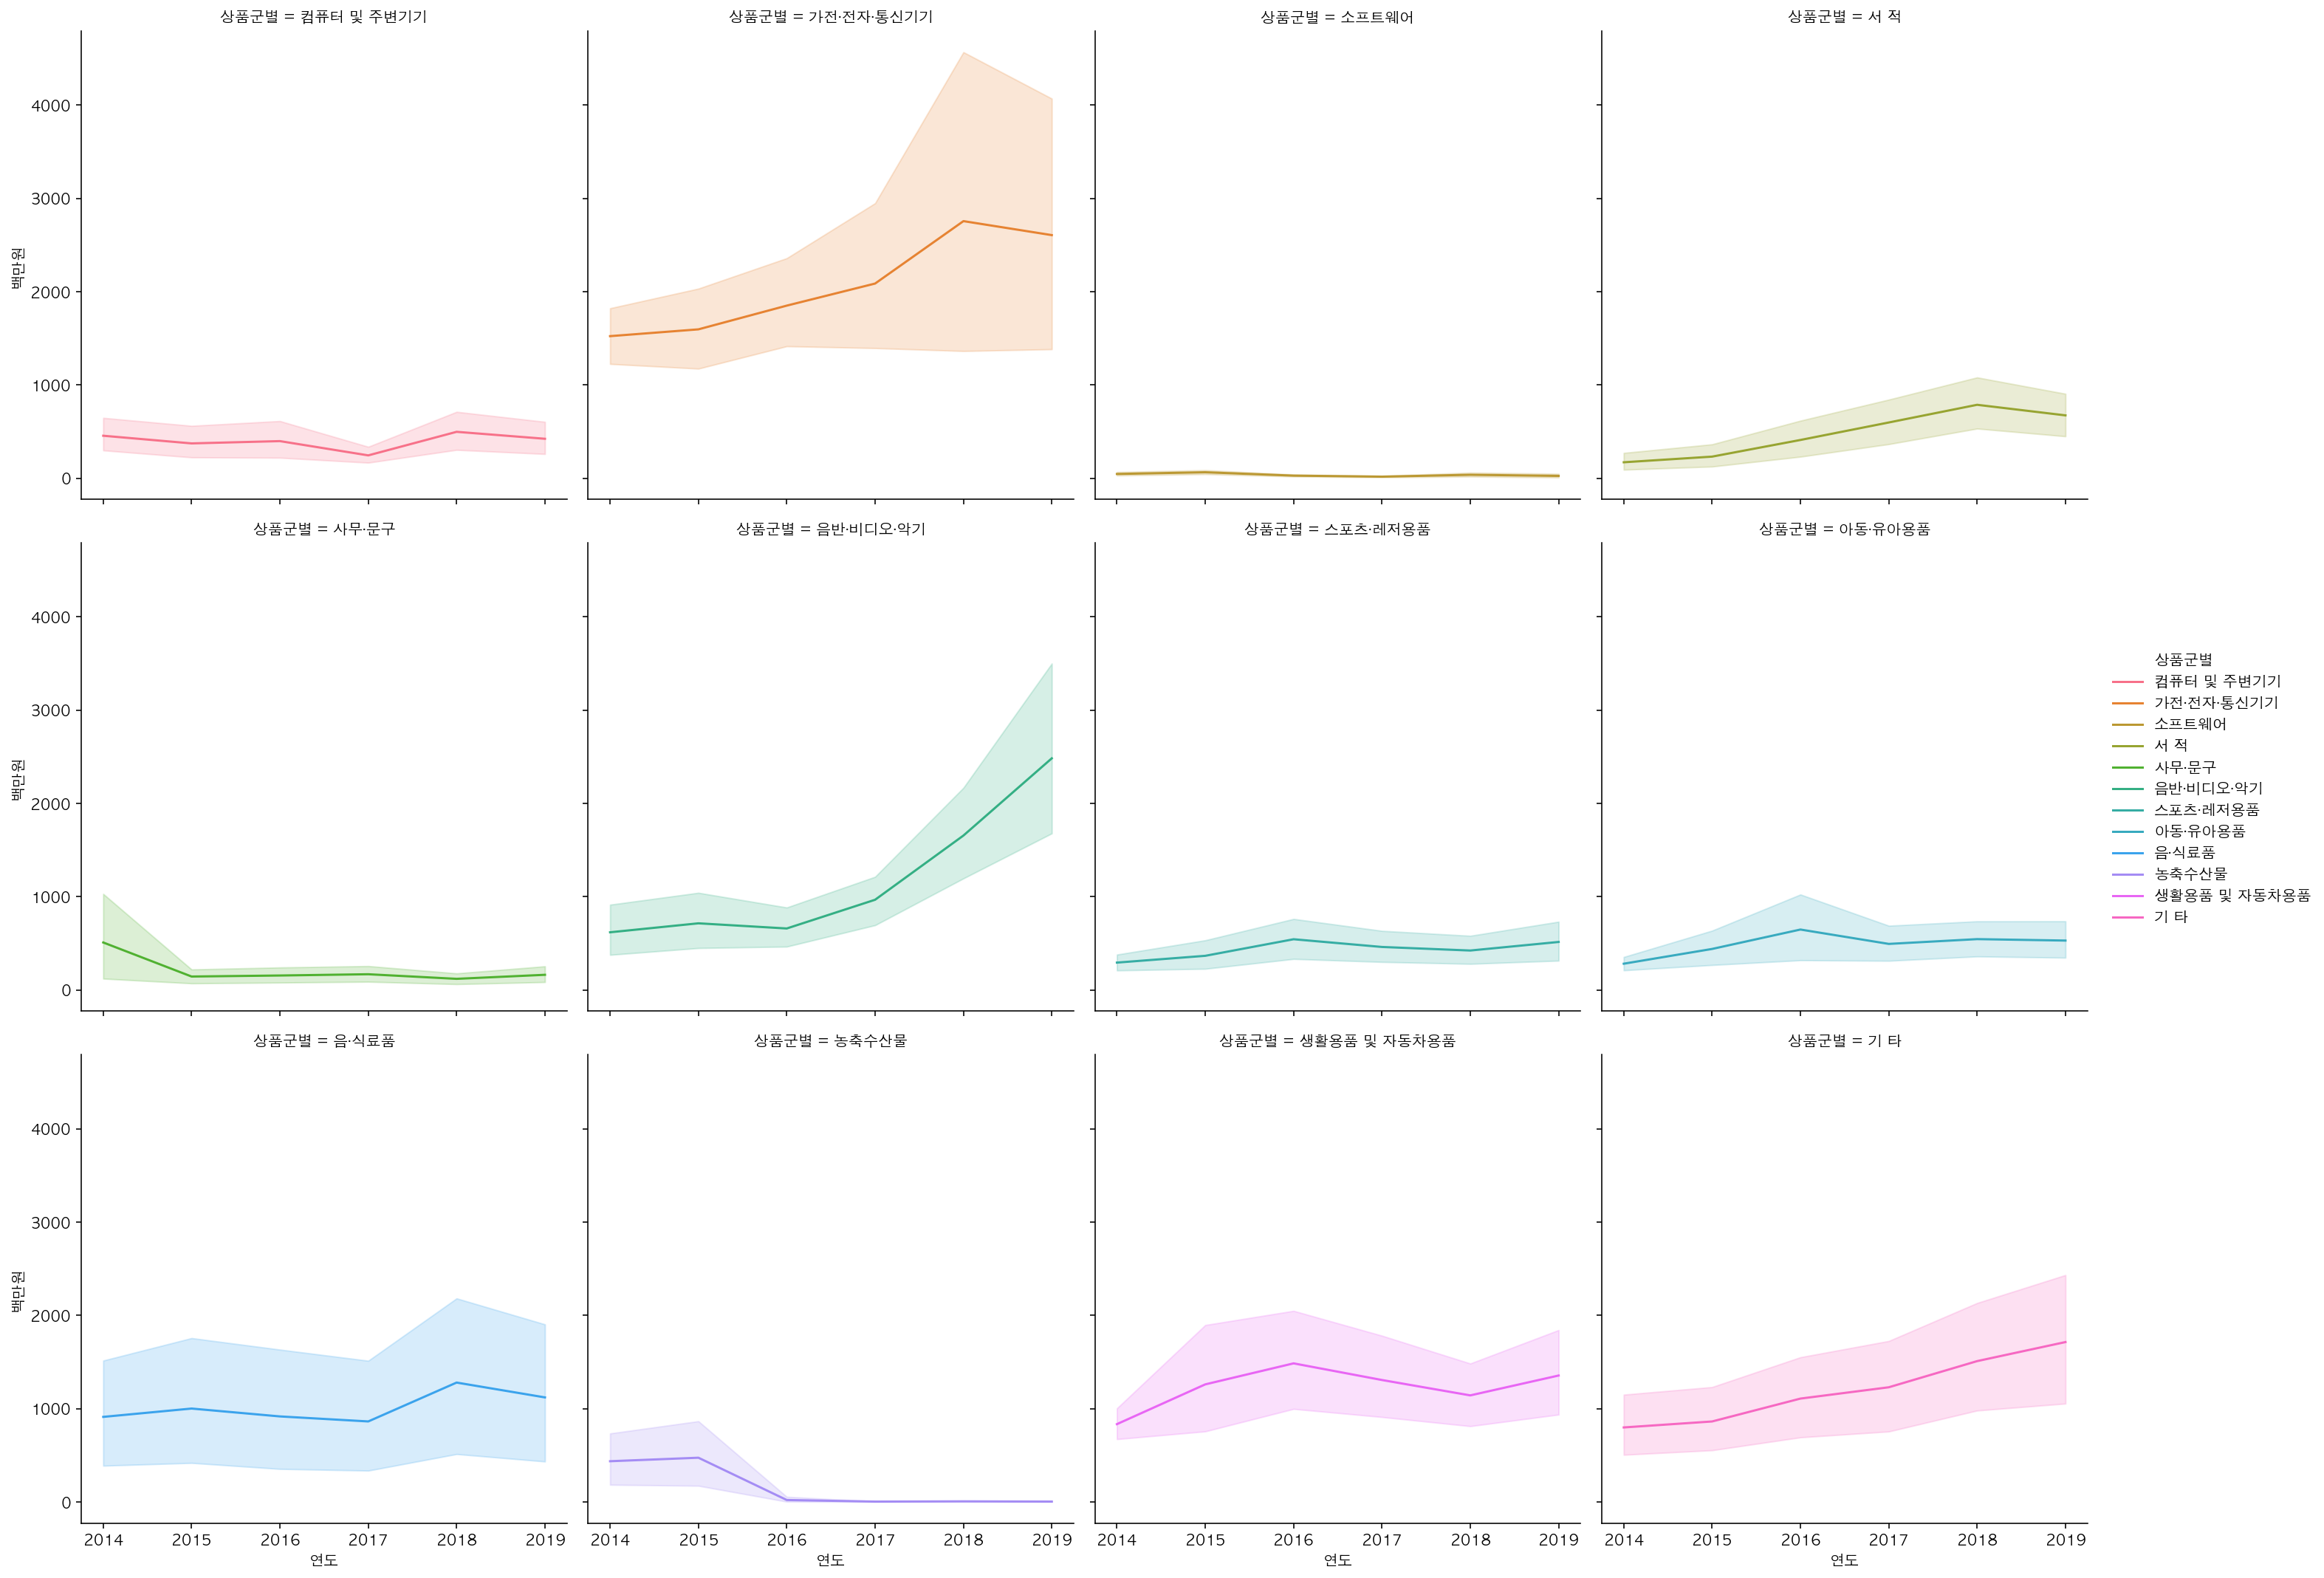

In [18]:
sns.relplot(data = df_sub, x = '연도', y = '백만원', hue = '상품군별', 
            kind = 'line', col = '상품군별', col_wrap = 4)

###  5-6

In [19]:
# 화장품에 대한 data
# copy x --> cosmetic data 변경시 df_total data도 변경됨

df_cosmetic = df_total[df_total['상품군별'] == '화장품'].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

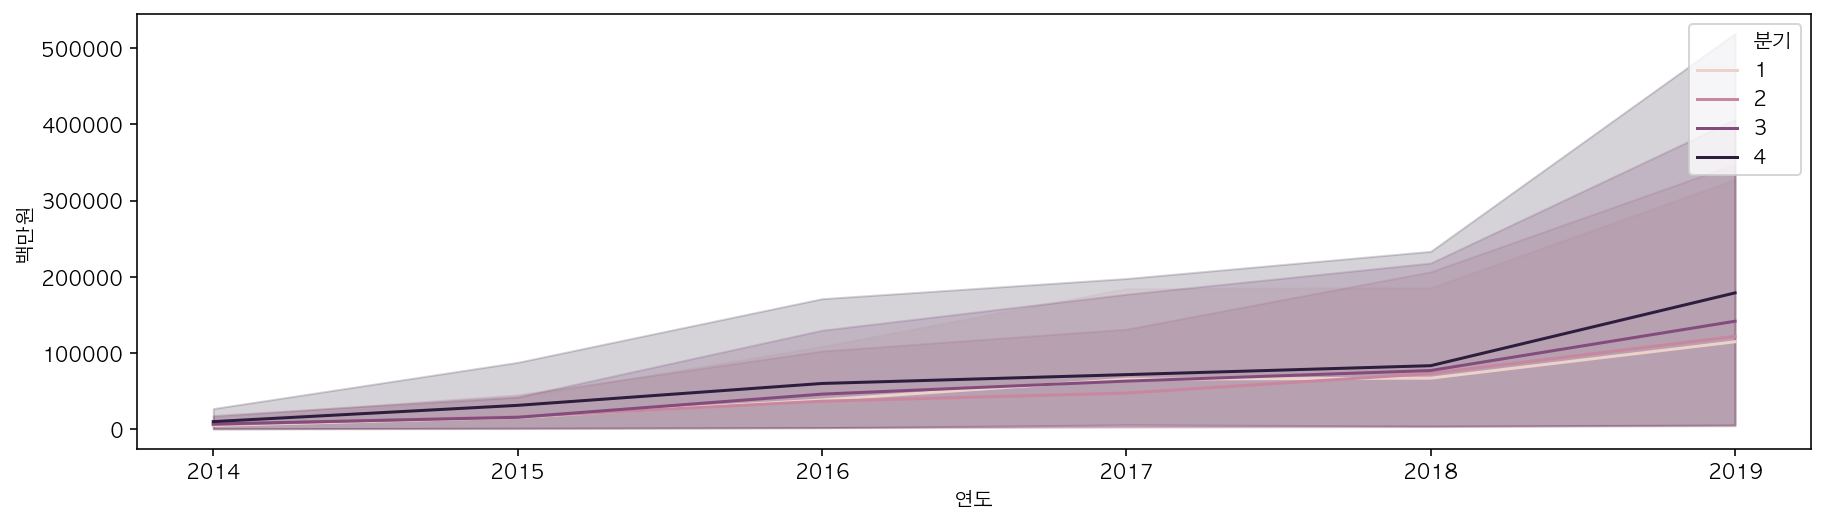

In [20]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x = '연도', y = '백만원', hue = '분기')

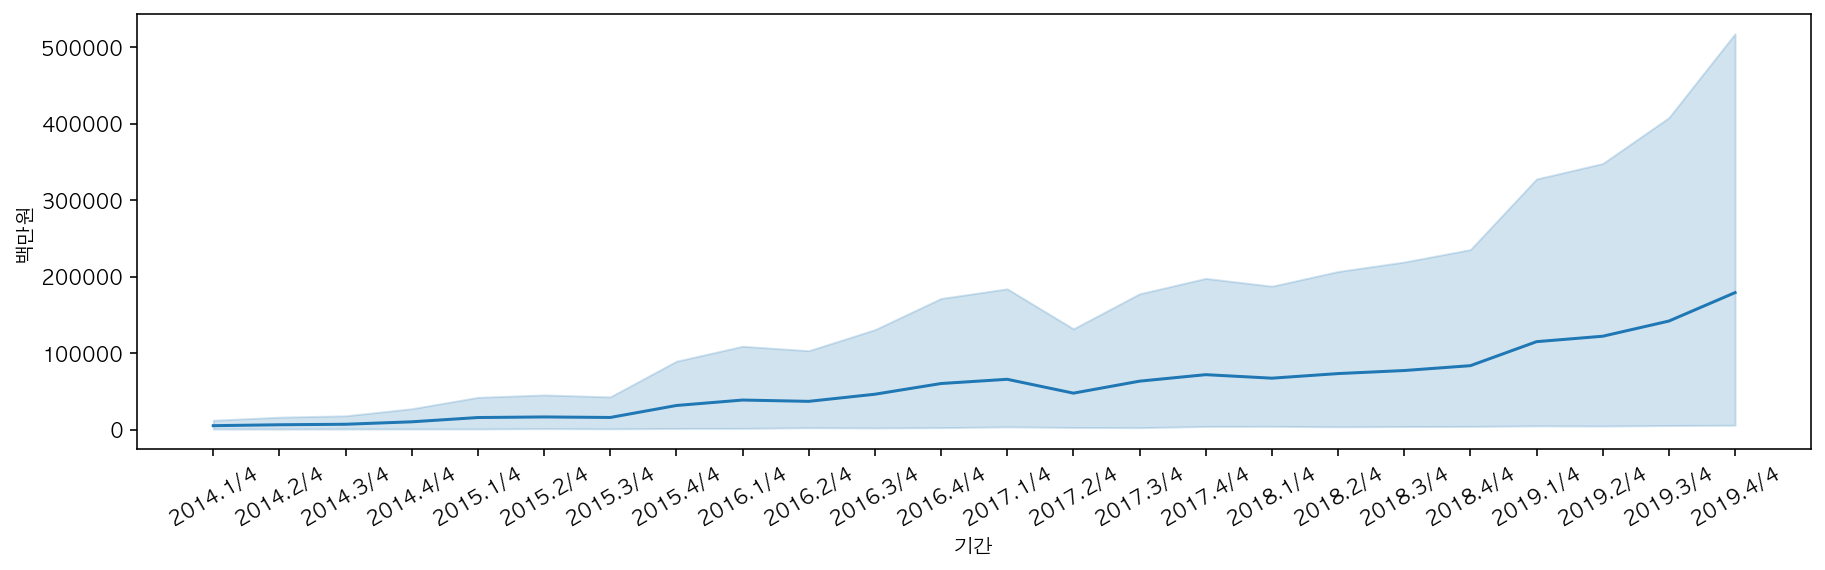

In [21]:
# 화장품 판매에 대한 기간별 금액 데이터

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
# x축 글씨 기울여서 보기

sns.lineplot(data = df_cosmetic, x = '기간', y = '백만원')

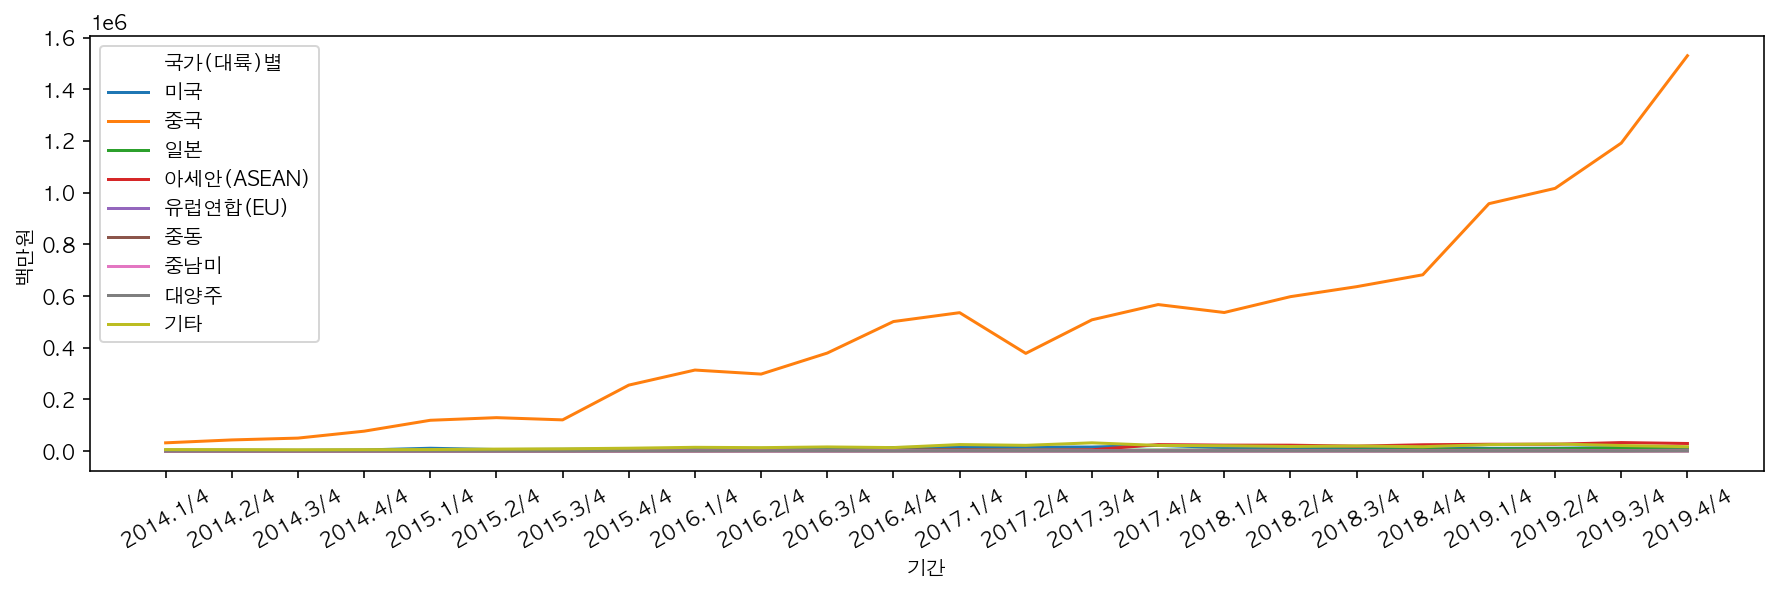

In [22]:
# 국가(대륙)별 화장품 판매액

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = '기간', y = '백만원',
            hue = '국가(대륙)별')

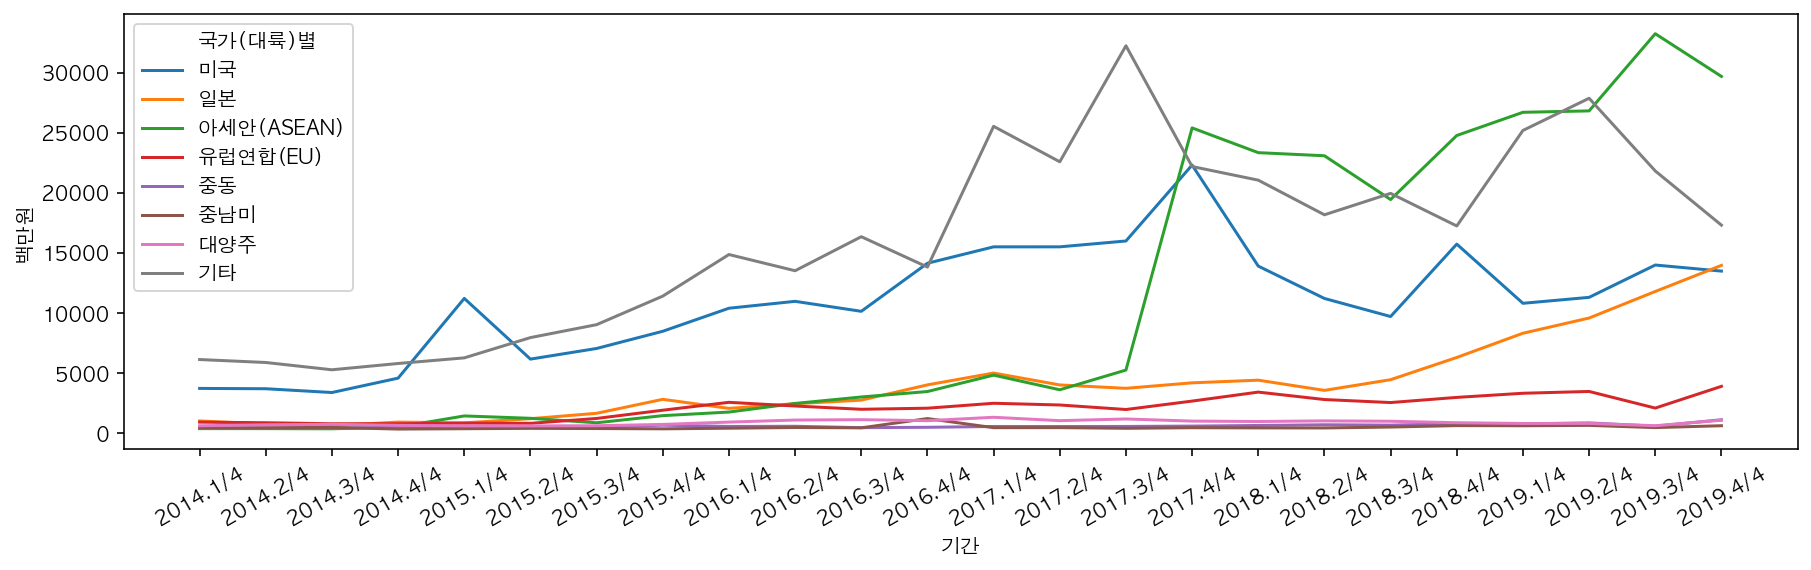

In [23]:
# 중국제외

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic[df_cosmetic['국가(대륙)별']!='중국'], 
             x = '기간', y = '백만원', hue = '국가(대륙)별')

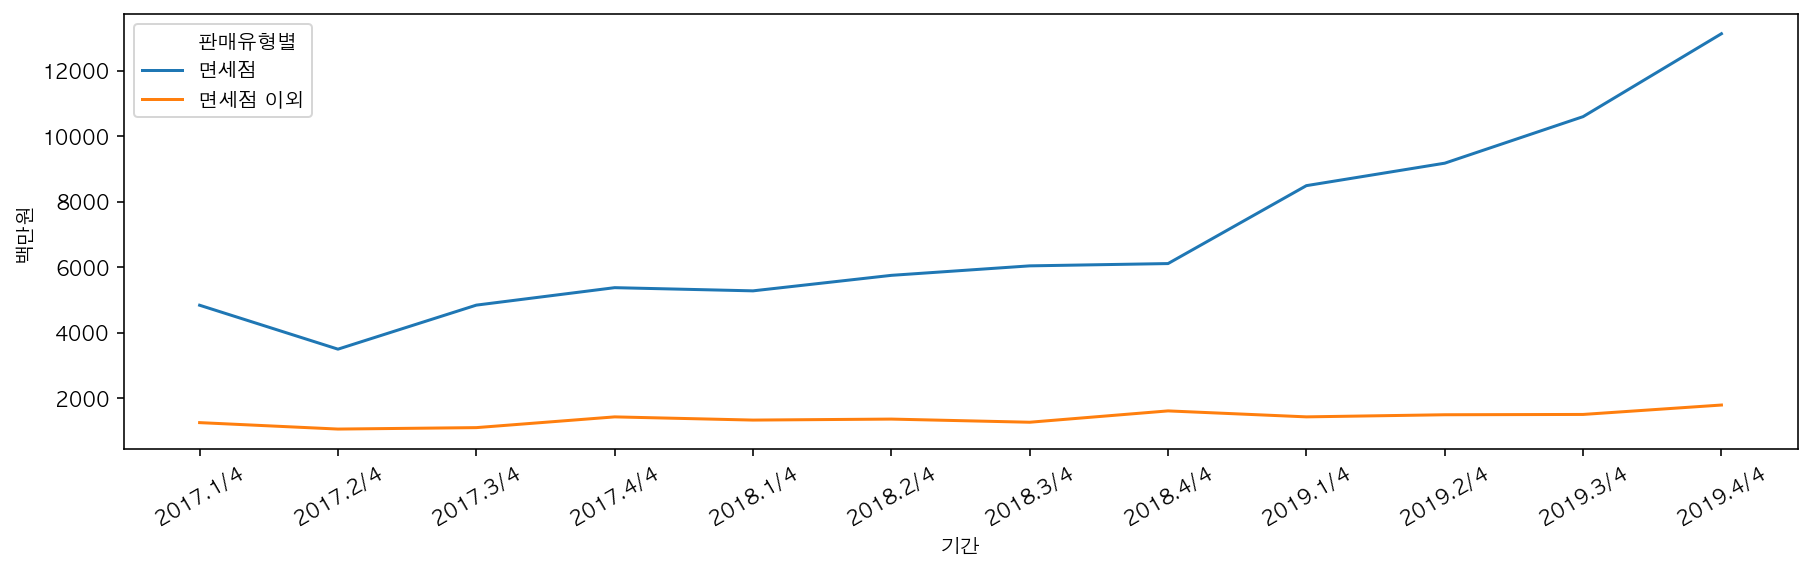

In [24]:
# 화장품 판매액에 대한 기간별 금액 데이터, 판매유형별로 구분

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)

df_sub = df[df['판매유형별'] != '계'].copy()
sns.lineplot(data = df_sub, x = '기간', y = '백만원', hue = '판매유형별'
            , ci = None)

### 5-7

In [32]:
# 의류 및 패션 관련상품 data

df_fashion= df[(df['상품군별'] == '의류 및 패션 관련상품')&(df['판매유형별'] == '계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


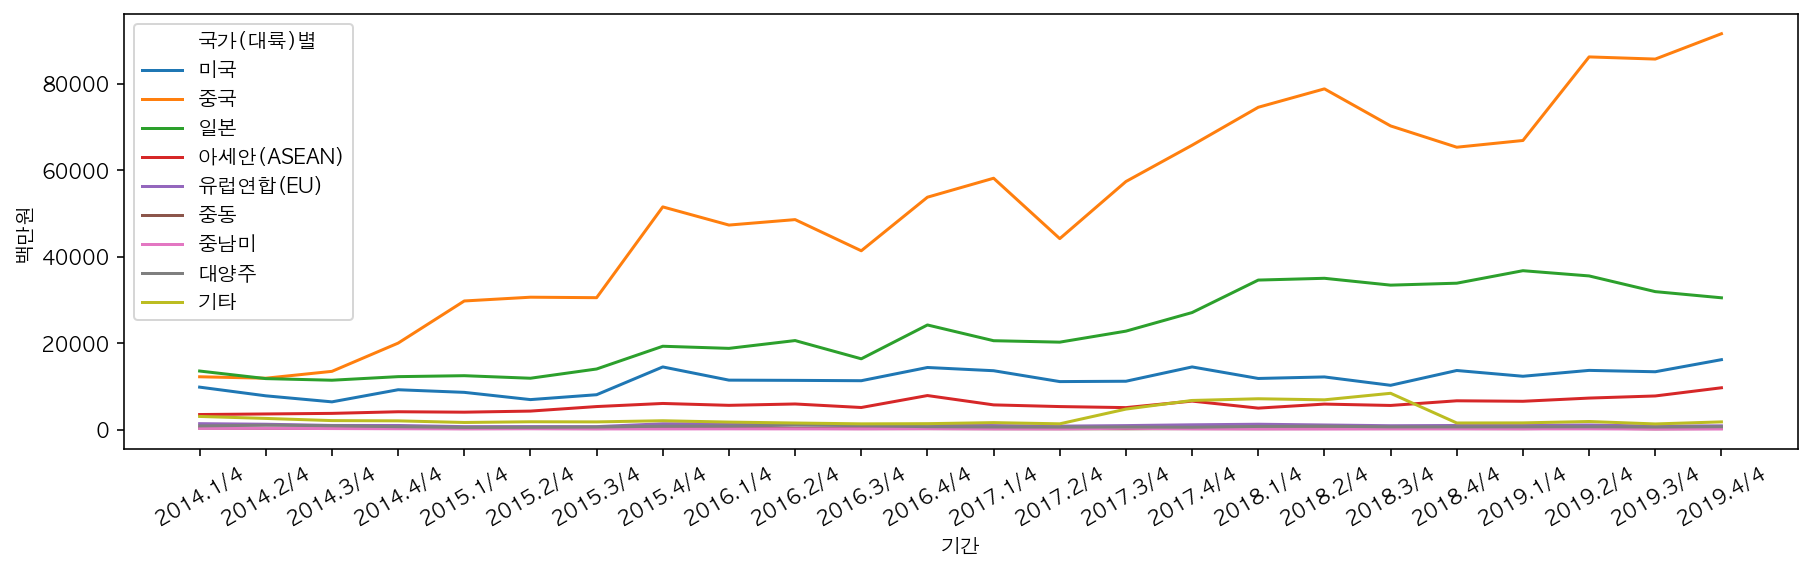

In [35]:
# 기간별 금액, 국가(대륙)별 구분

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = '기간', y = '백만원', hue = '국가(대륙)별')

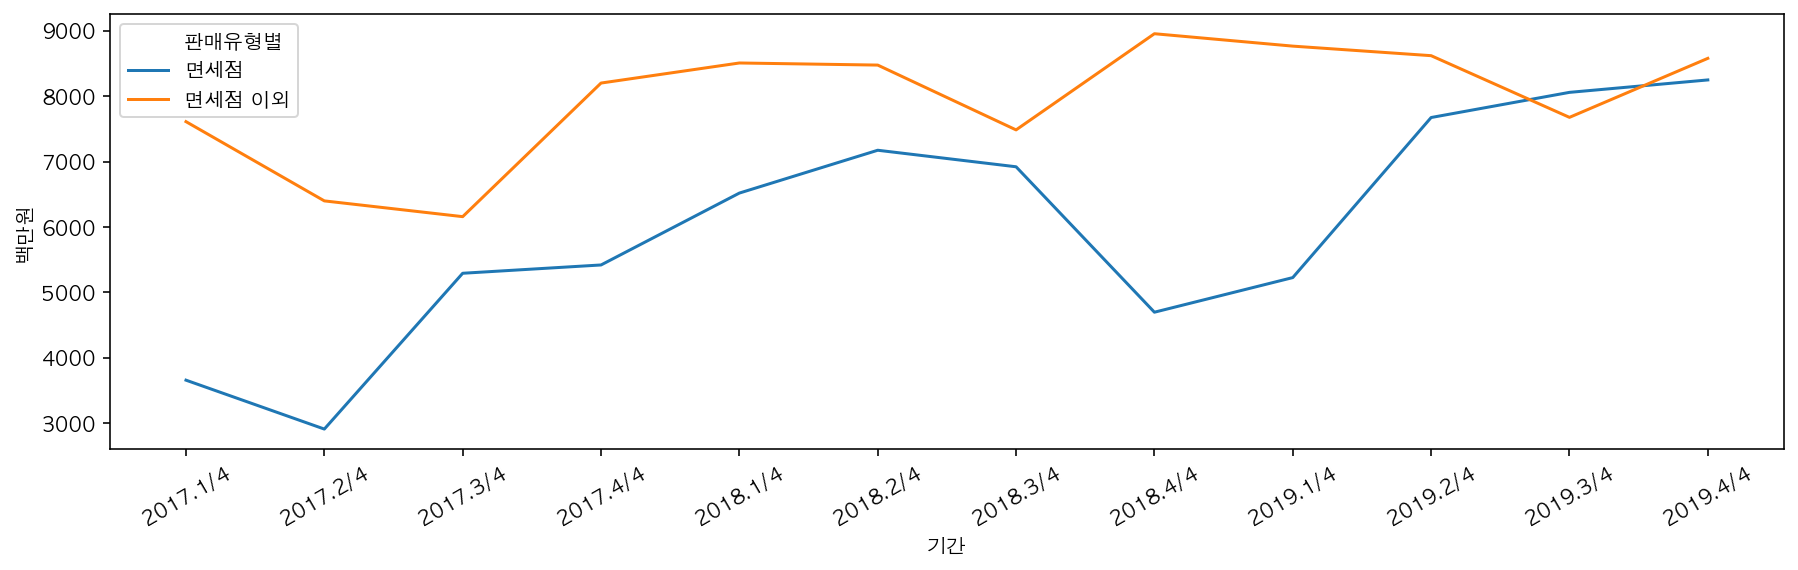

In [38]:
# 기간별 금액, 판매유형별 구분

df_fashion2 = df[(df['상품군별'] == '의류 및 패션 관련상품')&(df['판매유형별'] != '계')].copy()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2, x = '기간', y = '백만원', hue = '판매유형별', ci = None)

# 2017년 전의 면세점에 대한 data = NaN

### 5-8

In [45]:
# pivot 국가(대륙)별, 연도별 합계금액 표로 구하기

result = df_fashion.pivot_table(index = '국가(대륙)별', columns = '연도', 
                       values = '백만원', aggfunc = 'sum')

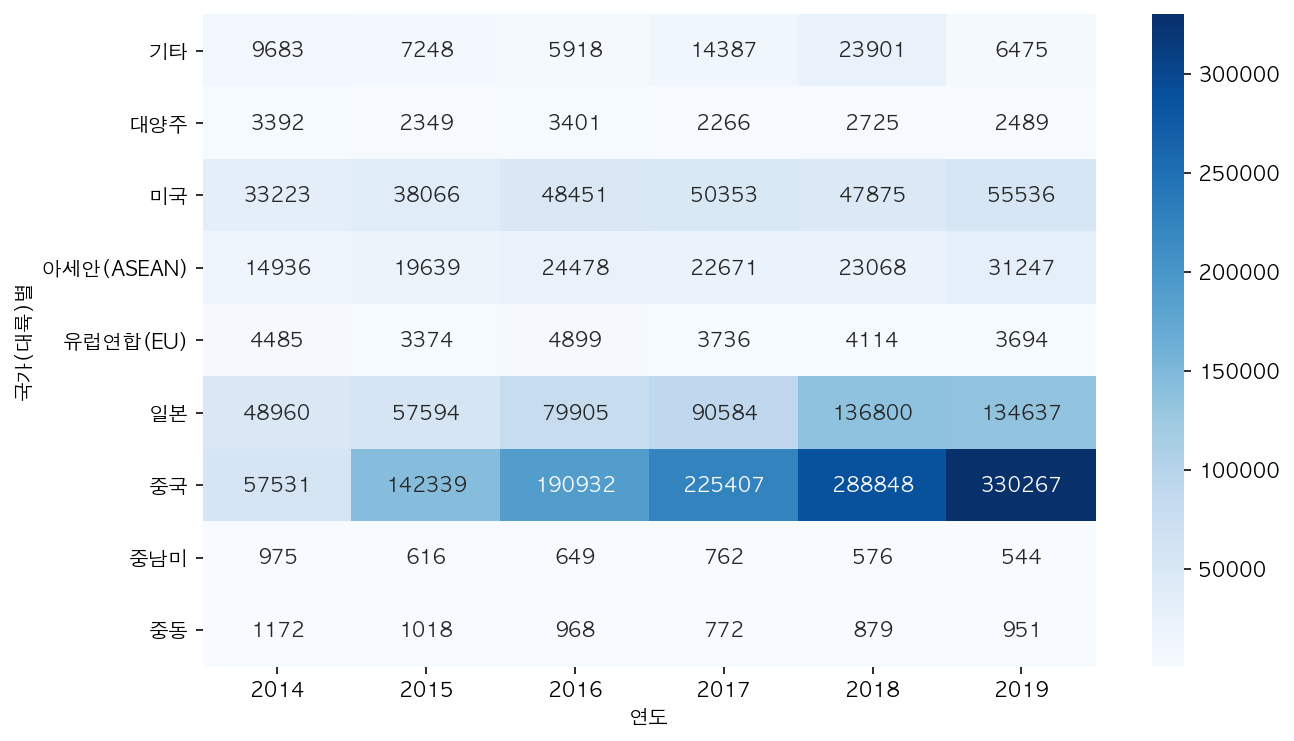

In [52]:
# 위의 값 시각화
# Blues_r -> 색반전

plt.figure(figsize = (10, 6))
sns.heatmap(result, cmap = 'Blues',  annot = True, fmt = '.0f')

### 5-9

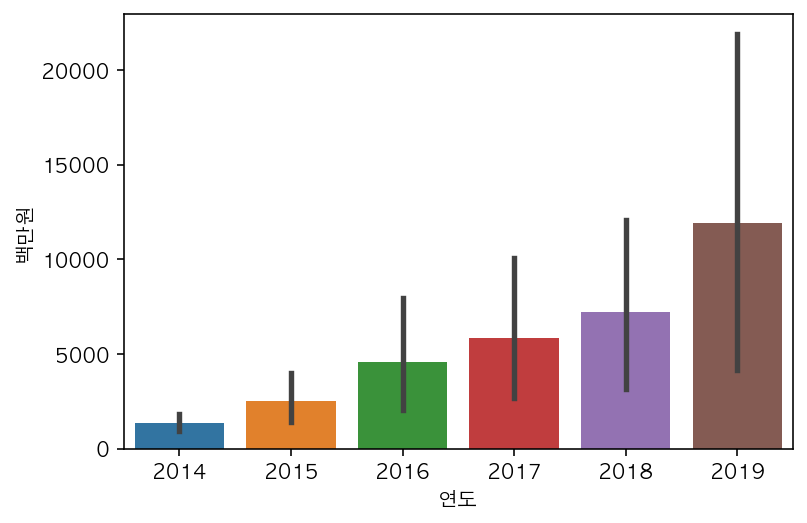

In [55]:
# df_total data에 대해 시각화


sns.barplot(data = df_total, x = '연도', y = '백만원')
# estimator=<function mean at 0x7fb533c1e280> -> default = mean



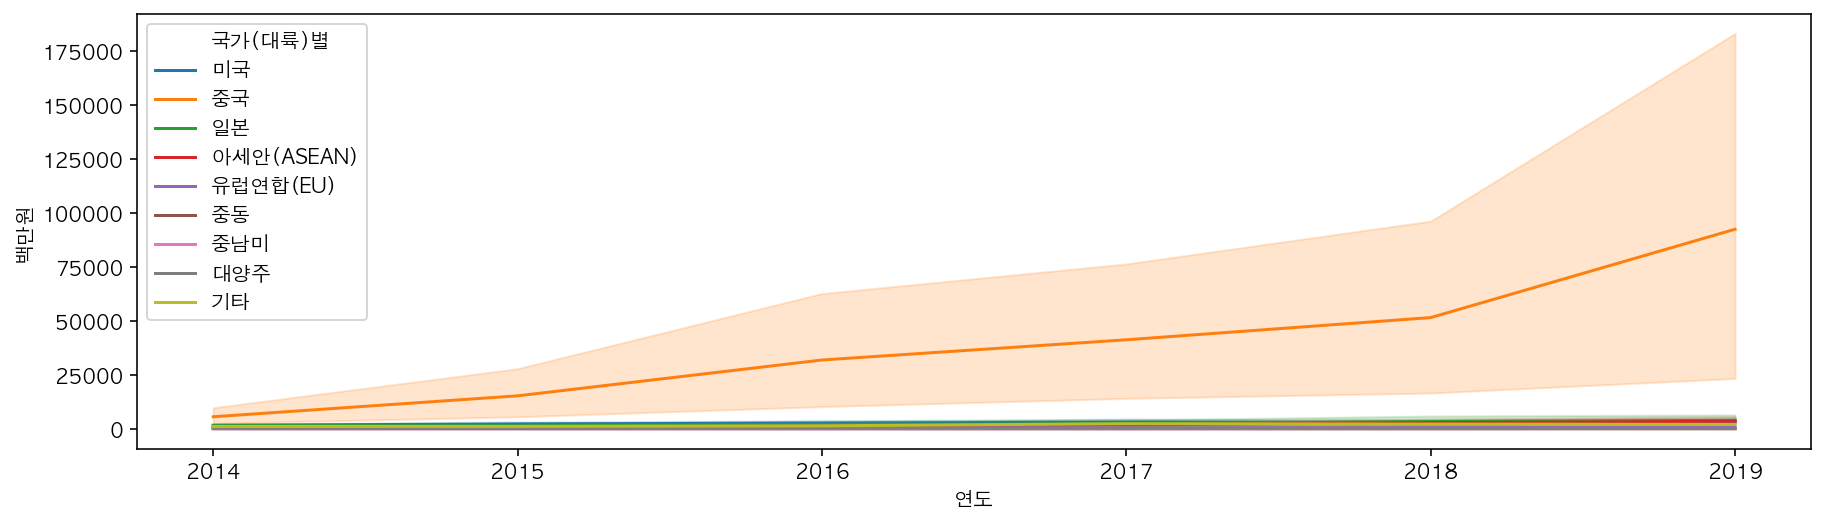

In [58]:
# 국가(대륙)별로 구분

plt.figure(figsize = (15, 4))
sns.lineplot(data = df_total, x = '연도', y = '백만원', hue = '국가(대륙)별')

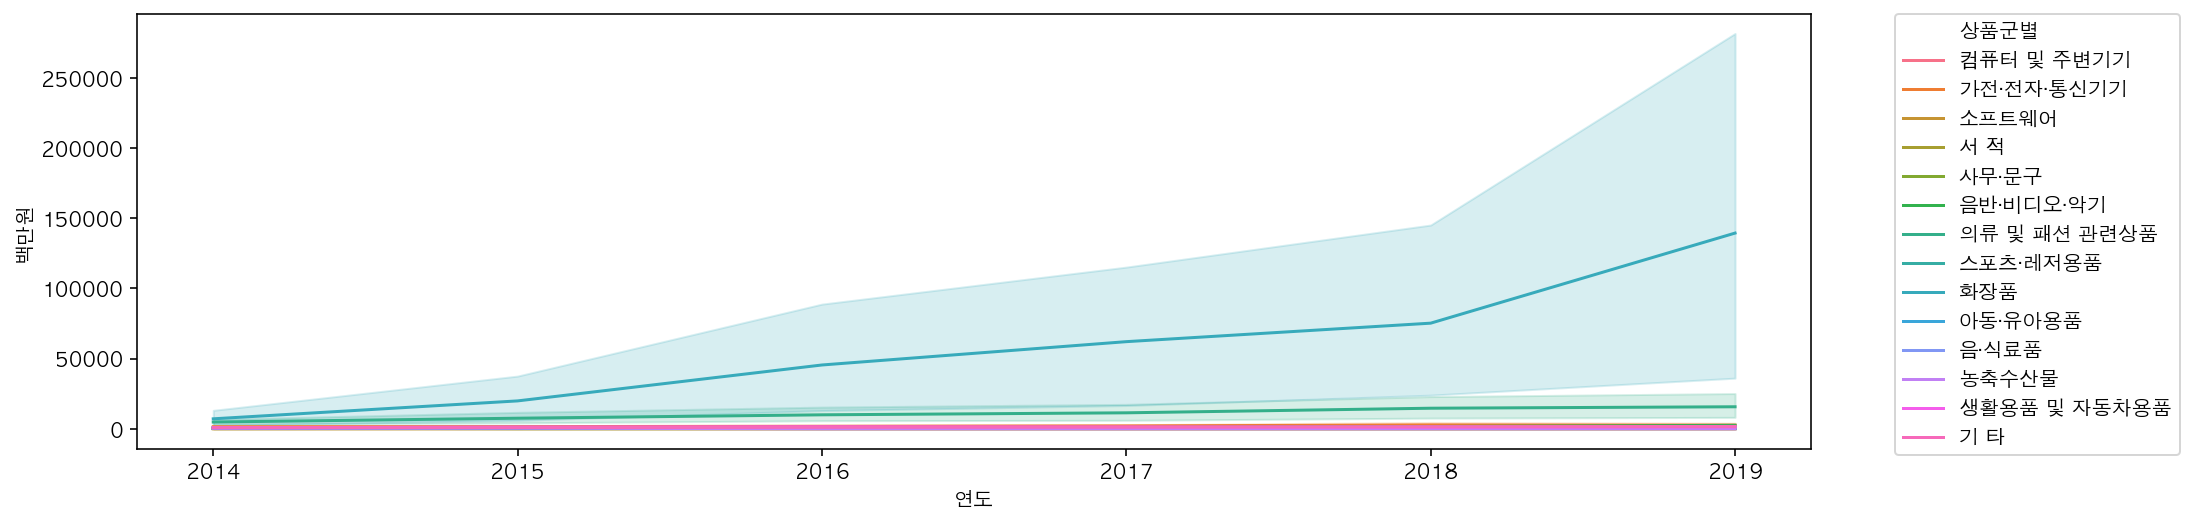

In [60]:
# 상품군별로 구분

plt.figure(figsize = (15, 4))
sns.lineplot(data = df_total, x = '연도', y = '백만원', hue = '상품군별')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
